In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mc_pion = pd.read_csv("Pion_1p1g_300MeV_recon_test.txt")
mc_compton = pd.read_csv("Compton_300MeV_recon_test.txt")


In [5]:
mc_compton.head()
mc_compton['id'] = mc_compton['id'].replace([2], 1)


In [4]:
mc_compton

,E_beam,E_gamma,theta_gamma,phi_gamma,E_p,theta_p,phi_p,MM,id
0,300.745,165.880,110.857,179.515,31.021,29.662,9.483,999.076,1
1,300.745,186.952,114.536,-128.901,26.594,30.387,70.070,966.831,1
2,300.745,193.474,142.199,134.576,43.129,16.757,-36.587,934.529,1
3,300.745,195.706,107.188,84.146,25.356,29.595,-92.565,961.759,1
4,300.745,218.917,106.207,27.699,24.277,34.185,-164.343,930.321,1
...,...,...,...,...,...,...,...,...,...
10069,300.745,198.592,112.800,63.293,18.899,27.489,-115.924,952.011,1
10070,300.745,169.184,153.462,-97.124,80.687,10.264,79.107,966.669,1
10071,300.745,192.072,149.734,-55.130,104.558,11.567,120.000,932.196,1
10072,300.745,185.161,131.823,-168.412,51.677,16.007,16.102,954.793,1


In [98]:
mc_pion

,E_beam,E_gamma,theta_gamma,phi_gamma,ncryst,MM,id
0,300.745,209.042,40.354,24.188,8,1011.206,2
1,300.745,231.604,38.959,95.216,9,989.511,2
2,300.745,82.609,75.814,-128.971,7,1119.019,2
3,300.745,188.412,99.159,138.558,6,979.695,2
4,300.745,109.208,67.185,-130.005,7,1095.254,2
...,...,...,...,...,...,...,...
72359,300.745,52.080,72.003,105.809,4,1151.242,2
72360,300.745,117.730,140.538,-44.118,6,1048.009,2
72361,300.745,78.029,105.280,169.260,7,1113.107,2
72362,300.745,142.714,60.953,171.022,8,1064.312,2


In [6]:
mc_sum = mc_compton.append(mc_pion, ignore_index=True)

mc_sum.head()
mc_sum.drop(["E_beam"], axis = 1, inplace = True)
mc_sum.drop(["phi_gamma"], axis = 1, inplace = True)
mc_sum.drop(["phi_p"], axis = 1, inplace = True)

C:\Users\Khach\AppData\Local\Temp\ipykernel_2952\293830423.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mc_sum = mc_compton.append(mc_pion, ignore_index=True)


In [7]:
mc_sum_reshuffle2 = mc_sum.sample(frac = 1).reset_index()
mc_sum_reshuffle2.drop("index", axis =1, inplace = True)

In [8]:
mc_sum_reshuffle2.head()

,E_gamma,theta_gamma,E_p,theta_p,MM,id
0,126.079,140.753,59.121,15.382,1036.136,1
1,39.025,45.883,100.110,5.191,1168.062,2
2,211.320,103.938,25.493,31.057,943.640,1
3,188.927,135.419,52.878,17.260,946.375,1
4,41.094,75.811,84.340,7.788,1161.448,2


In [9]:
mc_sum_reshuffle2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11457 entries, 0 to 11456
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   E_gamma      11457 non-null  float64
 1   theta_gamma  11457 non-null  float64
 2   E_p          11457 non-null  float64
 3   theta_p      11457 non-null  float64
 4   MM           11457 non-null  float64
 5   id           11457 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 537.2 KB


In [10]:
#mc_sum_reshuffle2_theta = mc_sum_reshuffle2
#mc_sum_reshuffle2_theta = mc_sum_reshuffle2[mc_sum_reshuffle2_theta["theta_gamma"] > 30.]
mc_sum_reshuffle2 = mc_sum_reshuffle2[mc_sum_reshuffle2["theta_gamma"] > 40.]
mc_sum_reshuffle2 = mc_sum_reshuffle2[mc_sum_reshuffle2["theta_gamma"] < 140.]
#mc_sum_reshuffle2 = mc_sum_reshuffle2[mc_sum_reshuffle2["MM"] < 1000.]
#mc_sum_reshuffle2 = mc_sum_reshuffle2[mc_sum_reshuffle2["MM"] > 920.]


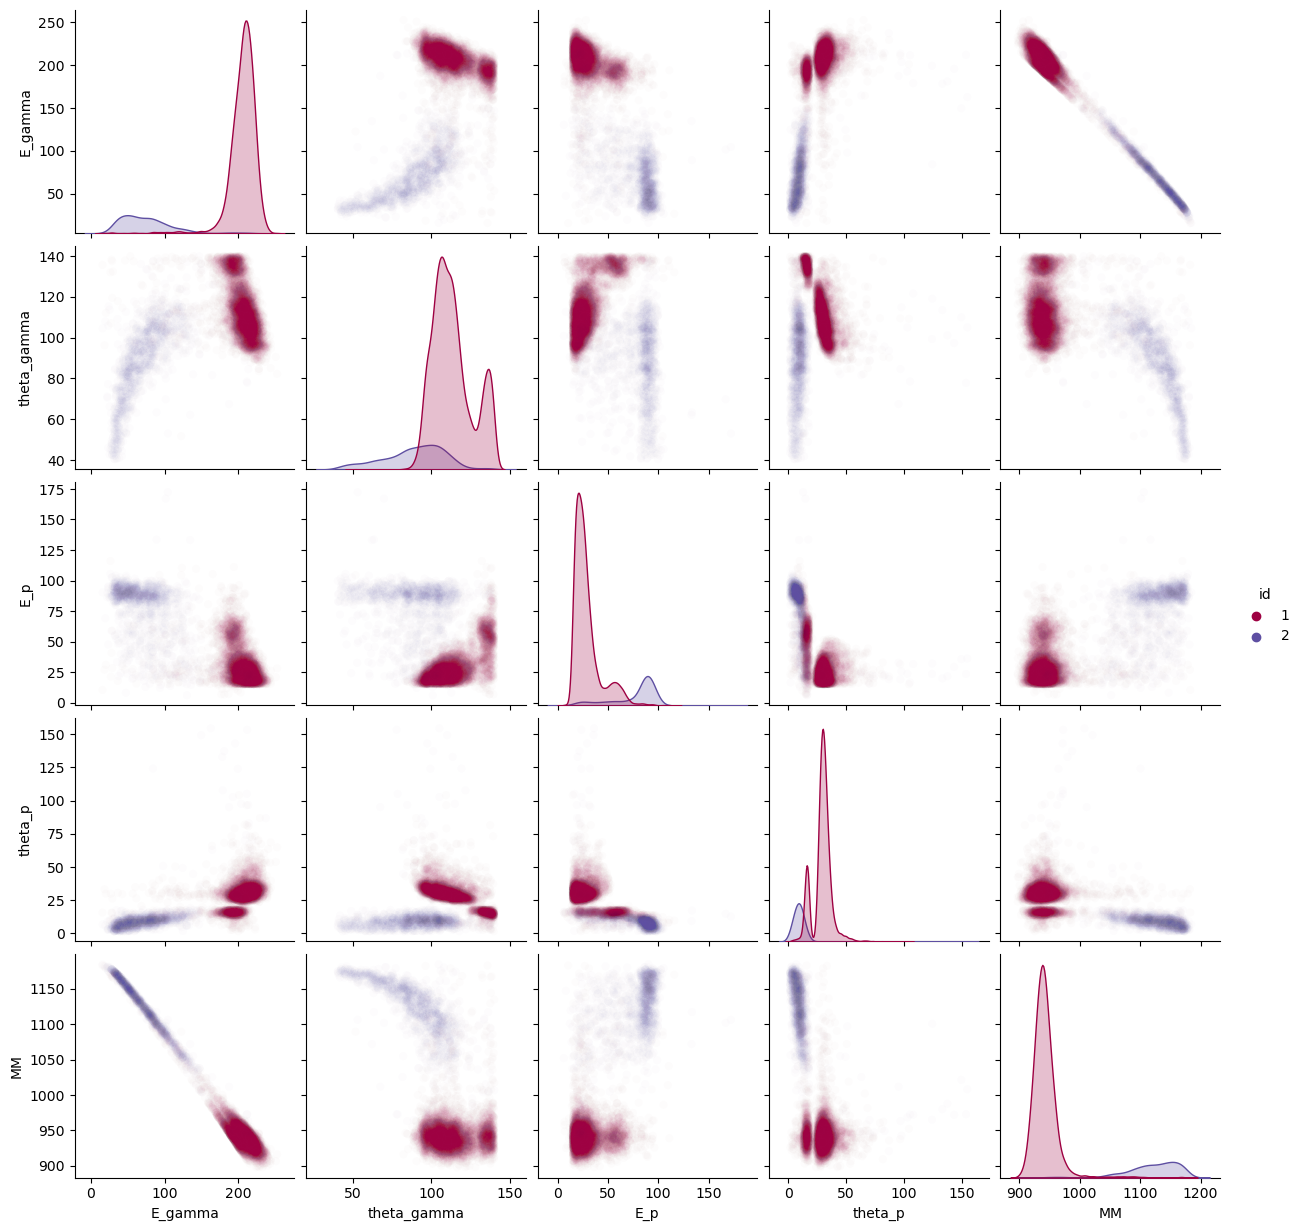

In [11]:
sns.pairplot(mc_sum_reshuffle2, hue = "id",  kind='scatter', plot_kws={'alpha':0.01}, palette='Spectral')

<AxesSubplot:>

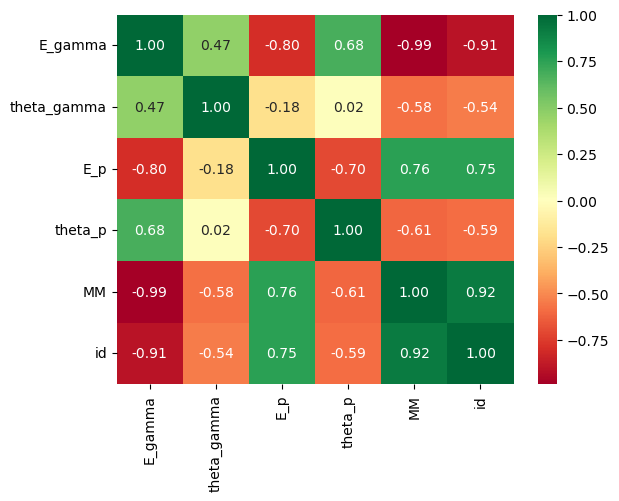

In [12]:
sns.heatmap(mc_sum_reshuffle2.corr(), annot = True, fmt='.2f', cmap='RdYlGn')

In [13]:
mc_sum_reshuffle3 = mc_sum_reshuffle2[np.isfinite(mc_sum_reshuffle2).all(1)]


In [14]:
mc_sum_reshuffle3

,E_gamma,theta_gamma,E_p,theta_p,MM,id
1,39.025,45.883,100.110,5.191,1168.062,2
2,211.320,103.938,25.493,31.057,943.640,1
3,188.927,135.419,52.878,17.260,946.375,1
4,41.094,75.811,84.340,7.788,1161.448,2
5,209.935,99.794,18.317,41.368,950.277,1
...,...,...,...,...,...,...
11450,218.238,104.964,16.303,29.708,932.757,1
11451,223.698,96.237,18.949,39.240,935.831,1
11452,197.454,115.265,30.185,26.991,951.180,1
11454,192.266,117.354,18.804,26.172,956.636,1


In [15]:
from sklearn.model_selection import train_test_split
#X = mc_sum_reshuffle3[['E_gamma', 'theta_gamma', 'E_p', 'theta_p']]
#y = mc_sum_reshuffle3['MM']
#y = mc_pion['id']
X = mc_sum_reshuffle3[['E_gamma', 'theta_gamma', 'MM', 'E_p', 'theta_p']]
y = mc_sum_reshuffle3['id']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [17]:
X_test.head(2)

,E_gamma,theta_gamma,MM,E_p,theta_p
4780,88.008,121.863,1094.853,94.906,3.224
10965,201.294,107.340,953.852,19.528,28.670


In [18]:
from sklearn.ensemble import RandomForestClassifier
#rfc = RandomForestClassifier(criterion = 'gini', max_depth = 10, 
#                             max_features = 3, min_samples_leaf = 1, 
#                             min_samples_split = 6, n_estimators = 410)
####200 iter * 3 cv
rfc = RandomForestClassifier(criterion = 'gini', max_depth = 10, 
                             max_features = 5, min_samples_leaf = 2, 
                             min_samples_split = 4, n_estimators = 400)
#rfc = RandomForestClassifier(n_estimators=400)
rfc.fit(X_train,y_train)

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

#rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
#              'n_estimators':np.arange(400, 500, step=50),
#              'max_features':randint(1,7),
#              'criterion':['gini'],
#              'min_samples_leaf':randint(1,4),
#              'min_samples_split':np.arange(2, 10, step=2)
#                      }

#rf_random = RandomizedSearchCV(rfc, rs_space, n_iter=200, scoring= 'precision', n_jobs=-1, cv=3, verbose = 10)
#model_random = rf_random.fit(X_train, y_train)

#grid_space={'max_depth':[3,5,10,None],
#              'n_estimators':[10,100,200],
#              'max_features':[1,3,5,7],
#              'min_samples_leaf':[1,2,3],
#              'min_samples_split':[1,2,3]
#           }
#grid = GridSearchCV(rfc, param_grid=grid_space, cv=3, scoring='accuracy')
#############
#grid_space={'max_depth':[10],
#              'n_estimators':[10,100,200],
#              'max_features':[5, 6, 7],
#              'min_samples_leaf':[1,2,3],
#              'min_samples_split':[4,5,6]
#           }

#grid = GridSearchCV(rfc, param_grid=grid_space, cv=1,scoring='accuracy', verbose = 10)
#model_grid = grid.fit(X_train, y_train)

In [62]:
print('Best hyperparameters are: '+str(model_random.best_params_))
print('Best score is: '+str(model_random.best_score_))

Best hyperparameters are: {'criterion': 'gini', 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 400}
Best score is: 0.8613227463564351


In [64]:
model_random.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 400}

In [126]:
model_random.cv_results_
GridResults2 = pd.DataFrame(model_random.cv_results_)
#GridResults.dropna(inplace = True)
#GridResults.head()
#GridResults2.info()
#sns.histplot(data = GridResults2, x = 'param_n_estimators', y = 'mean_test_score')
#GridResults2.drop(["std_fit_time"], axis = 1, inplace = True)
#GridResults2.head(2)
#sns.histplot(data = GridResults2, x = 'param_max_features', hue= 'param_max_depth', y = 'mean_test_score')
#sns.histplot(data = GridResults2, x = 'param_max_depth', hue= 'param_max_features', y = 'mean_test_score')
#sns.histplot(data = GridResults2, x = 'param_max_depth', hue= 'param_n_estimators', y = 'mean_test_score')
#GridResults2.to_csv('RFSearch_First.csv', index=False) 





In [146]:
RF_check_read = pd.read_csv("RFSearch_First.csv")
RF_check_read.head()
RF_check_read.describe()

,mean_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
count,200.000000,200.000000,200.000000,177.000000,200.000000,200.000000,200.00000,200.000000,156.000000,156.000000,156.000000,156.000000,156.000000,200.000000
mean,102.956859,2.523294,0.188447,49.774011,3.760000,1.975000,5.19000,427.250000,0.858743,0.843886,0.858146,0.853591,0.006934,100.500000
std,78.148952,1.568025,0.470118,26.606450,1.802399,0.817137,2.28693,24.961025,0.003716,0.001998,0.004411,0.002826,0.001874,57.879185
min,0.513665,0.000000,0.000000,10.000000,1.000000,1.000000,2.00000,400.000000,0.851556,0.838900,0.848653,0.847667,0.003265,1.000000
25%,46.648155,2.237758,0.022651,30.000000,2.000000,1.000000,4.00000,400.000000,0.856173,0.842824,0.855171,0.851890,0.005305,50.750000
50%,90.644578,3.034834,0.117356,50.000000,4.000000,2.000000,6.00000,450.000000,0.858574,0.844222,0.857518,0.853412,0.007177,100.500000
75%,176.103991,3.314835,0.224936,70.000000,5.000000,3.000000,8.00000,450.000000,0.860847,0.845236,0.860101,0.854944,0.008063,150.250000
max,260.005459,11.624103,5.614927,90.000000,6.000000,3.000000,8.00000,450.000000,0.867971,0.849336,0.872254,0.861323,0.011368,200.000000


In [19]:
predictions = rfc.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00      2192
           2       0.99      0.97      0.98       433

    accuracy                           0.99      2625
   macro avg       0.99      0.98      0.99      2625
weighted avg       0.99      0.99      0.99      2625

[[2186    6]
 [  14  419]]


In [25]:
#y_hats = model.predict(X_test)
#y_test['preds'] = predictions
#frame = {'preds': predictions}
#result = pd.DataFrame(y_test)
#result.rename(columns = {'id':'id_pred'}, inplace = True)

address = [predictions] 
# Using 'Address' as the column name
# and equating it to the list
X_test["id_predicted"] = predictions

y_test_array = y_test.to_numpy() 

#difference = [predictions - y_test] 
X_test["id_initial"] = y_test_array
#X_test.drop(["difference"], axis = 1, inplace = True)

difference = (predictions - y_test_array) 
X_test["difference"] = difference

X_test.head(10)

,E_gamma,theta_gamma,MM,E_p,theta_p,id_predicted,id_initial,difference
4780,88.008,121.863,1094.853,94.906,3.224,2,2,0
10965,201.294,107.340,953.852,19.528,28.670,1,1,0
5547,201.812,101.126,959.797,20.428,29.400,1,1,0
9494,68.783,91.101,1128.491,56.211,11.868,2,2,0
5394,47.295,84.687,1153.331,89.035,5.958,2,2,0
9497,202.063,112.967,946.883,35.773,41.514,1,1,0
10699,202.656,114.465,944.491,23.640,26.797,1,1,0
5275,204.535,120.096,936.053,28.723,25.778,1,1,0
8939,137.498,139.027,1020.571,67.440,11.632,1,1,0
10590,208.050,112.249,939.039,29.248,26.873,1,1,0


<AxesSubplot:xlabel='MM', ylabel='theta_gamma'>

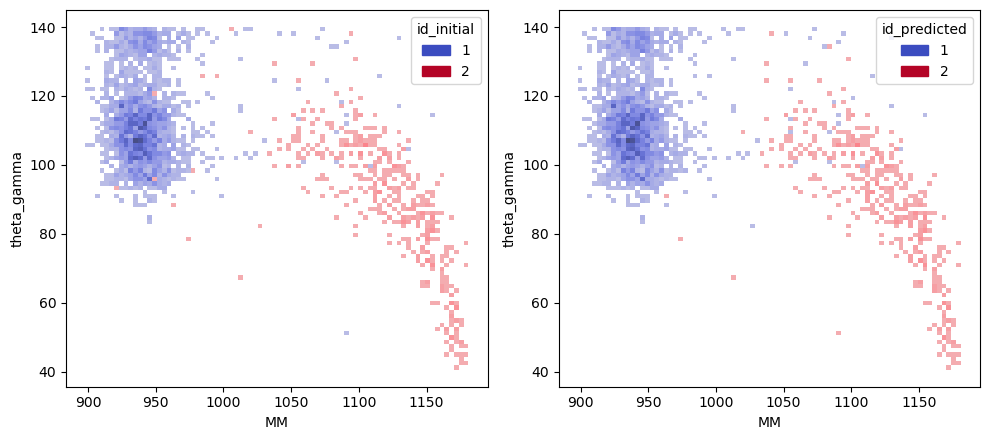

In [26]:
#sns.pairplot(X_test, hue = "difference",  kind='scatter', plot_kws={'alpha':0.03}, palette='coolwarm')
#sns.histplot(data = X_test, x = 'MM', y = 'theta_gamma', hue= 'id_initial', palette='coolwarm', bins = 80)
#sns.histplot(data = X_test, x = 'MM', hue= 'id_predicted', palette='coolwarm', bins = 100)
#ratio = X_test['id_predicted']/X_test['id_initial']
#sns.histplot(data = X_test, x = 'id_predicted', y = 'id_initial', palette='coolwarm')
#sns.histplot(data = X_test, x = 'MM', palette='coolwarm', hue = 'difference', bins = 100)

plt.rcParams["figure.figsize"] = [10.0, 4.5]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)
sns.histplot(data = X_test, x = 'MM', y = 'theta_gamma', hue= 'id_initial', palette='coolwarm', bins = 80, ax=axes[0])
sns.histplot(data = X_test, x = 'MM', y = 'theta_gamma', hue= 'id_predicted', palette='coolwarm', bins = 80, ax=axes[1])
